<h1>Import Libraries</h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

<h1>Load the dataset</h1>

In [2]:
internet = pd.read_csv('dataset\\Internet-Demographic.csv')

In [3]:
internet

,Country Name,Country Code,Birth rate,Internet users,Income Group
0,Aruba,ABW,10.244,78.9,High income
1,Afghanistan,AFG,35.253,5.9,Low income
2,Angola,AGO,45.985,19.1,Upper middle income
3,Albania,ALB,12.877,57.2,Upper middle income
4,United Arab Emirates,ARE,11.044,88.0,High income
...,...,...,...,...,...
190,"Yemen, Rep.",YEM,32.947,20.0,Lower middle income
191,South Africa,ZAF,20.850,46.5,Upper middle income
192,"Congo, Dem. Rep.",COD,42.394,2.2,Low income
193,Zambia,ZMB,40.471,15.4,Lower middle income


In [4]:
internet.describe().sum()

Birth rate        346.196395
Internet users    485.299059
dtype: float64

In [5]:
internet.isnull().sum()

Country Name      0
Country Code      0
Birth rate        0
Internet users    0
Income Group      0
dtype: int64

In [6]:
internet.dtypes

Country Name       object
Country Code       object
Birth rate        float64
Internet users    float64
Income Group       object
dtype: object

In [7]:
internet['Country Name'] = internet['Country Name'].astype('category')
internet['Income Group'] = internet['Income Group'].astype('category')

In [8]:
internet.dtypes

Country Name      category
Country Code        object
Birth rate         float64
Internet users     float64
Income Group      category
dtype: object

<h1>Convert categorical columns</h1>

In [9]:
internet['Income Group'] = internet['Income Group'].astype('category')

<h1>1. Histogram of Birth Rate</h1>

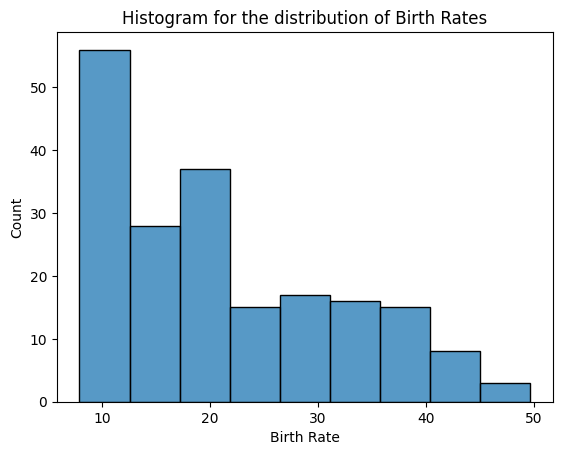

In [64]:
sns.histplot(internet['Birth rate'])
plt.title('Histogram for the distribution of Birth Rates')
plt.xlabel('Birth Rate')
plt.ylabel('Count')
plt.show()

<h2><span style="color:blue">INSIGHT 1.</span> As the visual shows the proper distribution of Birth Rates it can easily see that more than 50 approaching of 60 numbers of country has approximately 10 births on averange and less than 10 countries got 40-50 births on average.</h2>

<h1>2. Top 5 Countries with Highest Internet Usage</h1>

In [11]:
print('Top 5 Countries with Highest Internet Usage')
top_5 = internet[internet['Internet users'] > 94]
top_5

Top 5 Countries with Highest Internet Usage


,Country Name,Country Code,Birth rate,Internet users,Income Group
22,Bermuda,BMU,10.4,95.3000,High income
47,Denmark,DNK,10.0,94.6297,High income
84,Iceland,ISL,13.4,96.5468,High income
131,Norway,NOR,11.6,95.0534,High income
163,Sweden,SWE,11.8,94.7836,High income


<h2><span style="color:blue">INSIGHT 2.</span> The top 5 countries with the highest number of Internet Users on average which is greater than 94% are Denmark (94.63%), Sweden (94.78%), Norway (95.05%), Bermuda (95.30%), and Iceland (96.55%),</h2>

<h1>3. Count of Countries by Income Group</h1>

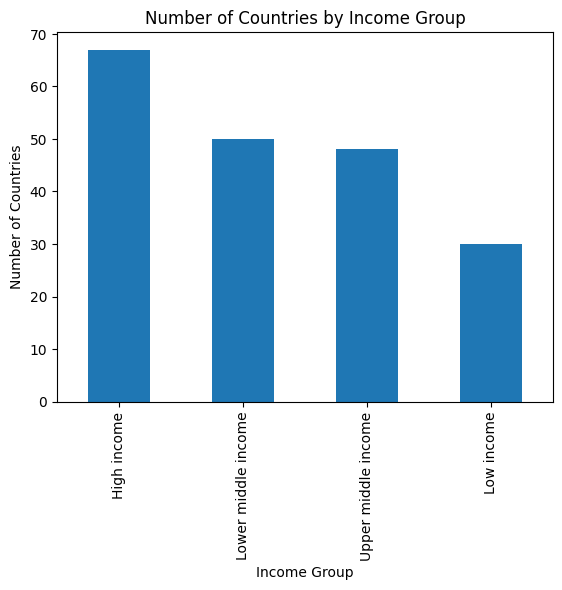

In [12]:
income = internet['Income Group'].value_counts()
income.plot(kind='bar')
plt.title('Number of Countries by Income Group')
plt.xlabel('Income Group')
plt.ylabel('Number of Countries')
plt.show()

<h2><span style="color:blue">INSIGHT 3.</span> The bar graph reveals that most of the countries is included in "High Income" group which is more 60 approaching 70 number of countries. While there is a lot of number of coutries included in the "High Income" group, almos 30 countries are considered to be in "Low Income" group.</h2>

<h1>4. Box Plot of Internet Users</h1>

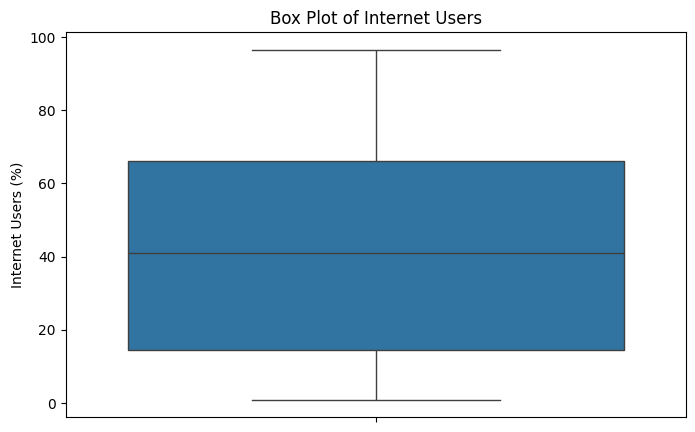

In [13]:
plt.figure(figsize=(8, 5))
sns.boxplot(y=internet['Internet users'])
plt.title('Box Plot of Internet Users')
plt.ylabel('Internet Users (%)')
plt.show()

<h2><span style="color:blue">INSIGHT 4.</span> The box plot indicates a relatively high concentration of data points within the interquartile range, suggesting that most countries or regions have internet user percentages clustered around a central value. However, there are notable outliers at both the lower and upper ends, indicating significant variability in internet penetration across different populations.</h2>

<h1>5. Countries with No Internet Access</h1>

In [14]:
no_internet = internet[internet['Internet users'] == 0][['Country Name']]
print("Countries with No Internet Access:\n", no_internet)

Countries with No Internet Access:
 Empty DataFrame
Columns: [Country Name]
Index: []


<h2><span style="color:blue">INSIGHT 5.</span> The analysis reveals that all countries in the dataset have at least some level of internet access, highlighting significant global progress in internet connectivity. This suggests that even regions with limited infrastructure still maintain a baseline level of internet availability, potentially enabling broader access to information and digital resources.</h2>

<h1>6. Average Birth Rate</h1>

In [15]:
average_birth_rate = internet['Birth rate'].mean()
print(f'Average Birth Rate: {np.round(average_birth_rate,2)}')

Average Birth Rate: 21.47


<h2><span style="color:blue">INSIGHT 6.</span> The average birth rate across the dataset is 21.47, indicating a moderate level of population growth. This value provides insight into the overall demographic trends and can be used to understand potential future population dynamics or resource needs in the analyzed regions.</h2>

<h1>7. Scatter Plot: Birth Rate and Internet Usage Relationship</h1>

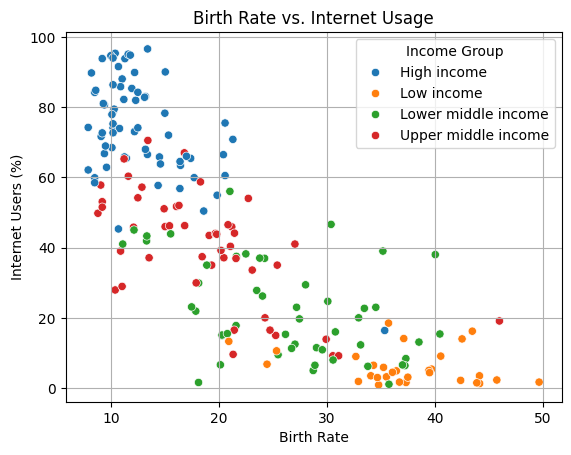

In [20]:
sns.scatterplot(x=internet['Birth rate'], y=internet['Internet users'], hue=internet['Income Group'])
plt.title('Birth Rate vs. Internet Usage')
plt.xlabel('Birth Rate')
plt.ylabel('Internet Users (%)')
plt.grid(True)
plt.show()


<h2><span style="color:blue">INSIGHT 7.</span> The scatter plot reveals a general trend where countries with higher birth rates tend to have lower internet usage, particularly among low-income and lower-middle-income groups. Conversely, high-income countries exhibit both higher birth rates and significantly higher internet usage. This suggests that economic factors play a crucial role in shaping both demographic trends and digital connectivity levels across different income groups.</h2>

<h1>8. Countries with Birth Rates Above 40</h1>

In [17]:
high_birth_rate = internet[internet['Birth rate'] > 40].value_counts()
print("Countries with Birth Rates Above 40:\n", high_birth_rate)

Countries with Birth Rates Above 40:
 Country Name      Country Code  Birth rate  Internet users  Income Group       
Angola            AGO           45.985      19.1            Upper middle income    1
Burkina Faso      BFA           40.551      9.1             Low income             1
Burundi           BDI           44.151      1.3             Low income             1
Chad              TCD           45.745      2.3             Low income             1
Congo, Dem. Rep.  COD           42.394      2.2             Low income             1
Gambia, The       GMB           42.525      14.0            Low income             1
Mali              MLI           44.138      3.5             Low income             1
Niger             NER           49.661      1.7             Low income             1
Nigeria           NGA           40.045      38.0            Lower middle income    1
Somalia           SOM           43.891      1.5             Low income             1
Uganda            UGA           

<h2><span style="color:blue">INSIGHT 8.</span> The list of countries with birth rates above 40 predominantly includes low-income and lower-middle-income nations, highlighting a strong correlation between high birth rates and economic development. These countries also exhibit relatively low internet usage percentages, suggesting that limited access to digital resources may be linked to demographic trends in less developed regions.</h2>

<h1>9. Pie Chart of Income Groups</h1>

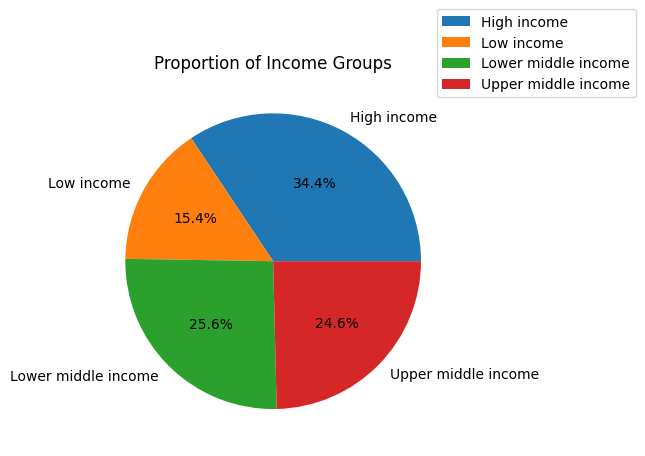

In [56]:
income = internet['Income Group'].value_counts().sort_index()
income.plot(kind='pie', autopct='%1.1f%%')
plt.title('Proportion of Income Groups')
plt.legend(bbox_to_anchor=(1.5, 1.2))
plt.ylabel('')
plt.show()

<h2><span style="color:blue">INSIGHT 9.</span> The pie chart shows that high-income countries constitute the largest proportion (34.4%) of the dataset, followed by upper-middle-income countries (24.6%), lower-middle-income countries (25.6%), and low-income countries (15.4%). This distribution indicates a significant representation of higher-income groups in the dataset, which may influence overall trends observed in birth rates, internet usage, and other socioeconomic indicators.</h2>

<h1>10. Correlation Between Birth Rate and Internet Usage</h1>

In [63]:
birthrate_internetuser_corr = internet['Birth rate'].corr(internet['Internet users'])

corr_rounded_10 = np.round(birthrate_internetuser_corr, 2)
print("Correlation Between Birth Rate and Internet Usage:\n", corr_rounded_10)


Correlation Between Birth Rate and Internet Usage:
 -0.82


<h2><span style="color:blue">INSIGHT 10.</span> The analysis reveals that there is no significant correlation between Average Birth Rate and Internet Users in a country.</h2>